# TP Machine Learning N°7 "Aral Sea"
<table>
    <tr>
        <td> JÉZÉGOU 
        <td>Pierre-Yves
    <tr>
        <td> LE BER 
        <td>Nicolas
</table>

# Imports

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from loadImages import loadImages
from displayFeatures2d import displayFeatures2d
from displayFeatures3d import displayFeatures3d
from selectFeatureVectors import selectFeatureVectors
from displayImageLabel import displayImageLabel

# 1. Objectif
Nous allons dans ce TP estimer la diminution de la surface de la mer d’Aral (partag´ee entre le Kazakhstan au nord et l’Ouzb´ekistan au sud), à partir des couvertures satellites de 1973 et de 1987 (donnéesUSGS).
L’objectif est d’écrire des scripts permettant de mettre en œuvre un système basé sur différentes approches de machine learning. Ce système visera l’estimation sur chaque image de la surface de la mer d’Aral et en déduira sa diminution au cours du temps. Ces scripts devront ainsi suivre la chaîne générale d´ecrite en cours (à l’exception de la phase de captation) :
<ul>
    <li> prétraitements
    <li> extraction des descripteurs
    <li> apprentissage d’un modèle de classement
    <li> classement des pixels
</ul>
Pour commencer avec cette séance, vous aurez besoin de télécharger le stater code disponible sur le lien Moodle du cours.

# 2. Fichiers inclus dans le starter code pour cette séance
<ul>
    <li> Aral1973 Clean.jpg - fichier image de 1973 de la mer d’Aral ;
    <li> Aral1987 Clean.jpg - fichier image de 1987 de la mer d’Aral ;
    <li> loadImages.py - charge les images de la mer d’Aral ;
    <li> displayFeatures2d.py - permet d’afficher les valeurs des descripteurs en 2d ;
    <li> displayFeatures3d.py - permet d’afficher les valeurs des descripteurs en 3d ;
    <li> displayImageLabel.py - permet l’affichage de l’image des labels à partir d’un vecteur de labels prédits ;
    <li> selectFeatureVectors.py - mise en forme des descripteurs
    <li> * aralsea main.py - script Python qui vous servira de point de départ pour cette séance ;
    <li> * preprocessing.py - fonction qui charge les deux images, les pr´etraitent, les mets en forme pour la suite,
    <li> * unsupervisedTraining.py - apprentissage d’un classifieur non supervisé selon deux modèles ;
    <li> * unsupervisedClassifying.py - classement d’un classifieur non supervisé selon deux modèles.
</ul>
[*] indique les fichiers que vous devez completer.

# 3. Exament des Données, prétraitements et extraction des descripteurs
## Q1. Compléter la fonction preprocessing() permettant de charger les deux images et de les afficher. indication : loadImages().

In [16]:
def preprocessing():
    img73,img87 = loadImages() # Loading images
    
    img73 = img73[72:840, :, :] # Tronquages des Images
    img87 = img87[72:840, :, :] 
    
    sub_73 = selectFeatureVectors(img73, 500) # Sub sampling images
    sub_87 = selectFeatureVectors(img87, 500)
    
    featLearn = np.concatenate((sub_73[0], sub_87[0]))
    
    return featLearn, img73, img87
    

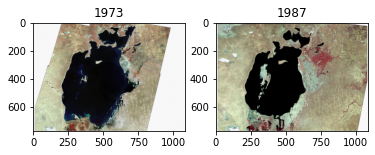

In [17]:
featLearn, img73, img87 = preprocessing()
plt.figure("Input Images") # Displaying Loaded Images
plt.subplot(121)
plt.imshow(img73)
plt.title("1973")
plt.subplot(122)
plt.imshow(img87)
plt.title("1987")
plt.show()


## Q2. Que peut-on déduire de l’analyse de ces images ? Comment sont codées les valeurs des pixels ?
Les deux images representes une vue satelite de la mer d'aral l'un en 1973 et l'autre en 1987.
ces images sont encodées par trois valeurs par pixel (Rouge, Vert, Bleu) chacune de ces valeurs renseigne sur l'intesité de la couleur qu'elle represente pour ce pixel 

## Q3. Les images sont en couleurs et nous allons utiliser les composantes des couleurs comme descripteurs de classification. Quelle est la dimension de l’espace des descripteurs lorsque l’image est codée en RGB (RVB) ?

### awaiting response


## Q4. Tronquer de la même manière les deux images pour faire disparaître le texte dans la partie haute et basse des images.
cf. preprcessing() : 
```python
def preprocessing():
    # ...
    img73 = img73[72:840, :, :] # Tronquages des Images
    img87 = img87[72:840, :, :] 
    # ...
    return featLearn, img73, img87
```

# 4. Constitution d’un ensemble de données d’apprentissage
## Q1. Compléter la fonction preprocessing() par une partie qui vise à constituer une base d’apprentissage. Pour cela, réalisez un sous-échantillonnage de l’image de 1973 avec un pas de 500 points (indication : selectFeatureVectors.py). Quel est le nombre de données d’apprentissage ?

cf prepocessinf()
```python
def preprocessing():
    # ... 
    sub_73 = selectFeatureVectors(img73, 500) # Sub sampling images
    sub_87 = selectFeatureVectors(img87, 500)
    
    featLearn = np.concatenate((sub_73[0], sub_87[0]))
    
    return featLearn, img73, img87
```

In [18]:
print("Nombre de données d'appentissage (73 et 87) : " + str(featLearn.shape[0]) + " features")

Nombre de données d'appentissage (73 et 87) : 3338 features


# 5. Premère analyse des données
## Q1. Dans preprocessing, visualiser en 2D et 3D les valeurs des descripteurs. La visualisation en 2D des vecteurs d’apprentissage se fait par la fonction displayFeatures2d(feat) et en 3D displayFeatures3d(feat).

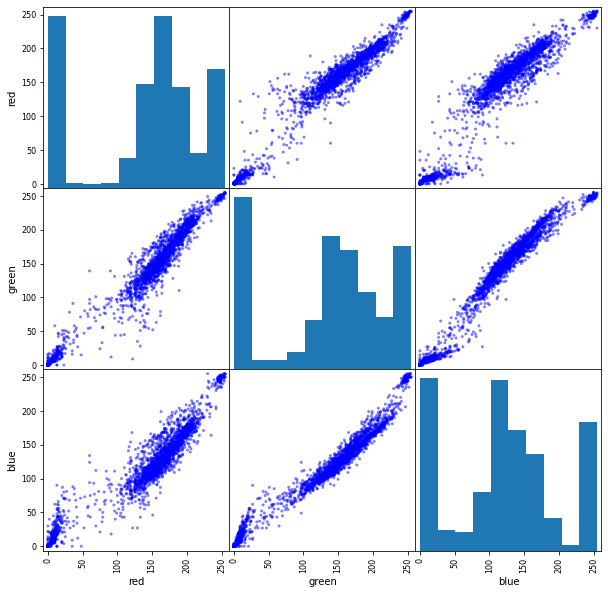

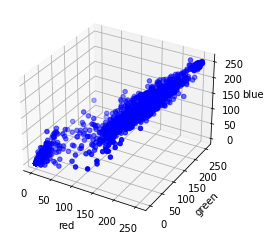

In [19]:
displayFeatures2d(featLearn)
displayFeatures3d(featLearn)
plt.show()

## Q2. D´ecrivez explicitement ces graphiques en expliquant ce qu’ils représentent, en donnant leurs caractéristiques pour les histogrammes et les nuages de points (différents groupes ? à quelles informations peut-on les relier ?)
Sur les graphiques chaque point represente un pixel et c'est coordonées selon chacun des axes ses Valueurs R, G, B on distingue "deux" groupe, un groupe claire (forte valeurs R,G,B) et un groupe sombre on en deduit que le groupe sombre represente la mer et le groupe claire le reste

# 6. Approche non supervisée par la méthode des k-means
Pour cette première approche non-supervisée, nous allons mettre en œuvre un système basé sur l’algorithme des k-moyennes (k-means), variantes de la méthode des centres mobiles. Créer un script reprenant ce que vous avez fait dans la section précédente.

## Q1. Décrire avec vos mots la méthode des centres mobiles.
la methode des centres mobiles pour deux classes consiste à d'abort placée deux (au hasard) 'centroïde' representent le centre de chaque classe une fois c'est deux centroïde placé un vient tracé la bisectrice au segment les reliant elle constituera la frontiere de decision de l'iteration une fois la fonctière definie on place les centroïdes aux barycentre des classe formé par la frontière de decision on retrace alors la bisectrice et separent les deux nouvelle classe, on va repeter les operation le replacement et de tracage d'un nouvelle frontière jusqu'a ce que la varaiation de la frontière sois minime

## Q2. : Appeler et compléter le script unsupervisedTraining.py qui permet réaliser un apprentissage non supervisé du modèle de classement (classifieur) à l’aide de la fonction KMeans() du package scikit-learn (puissant package de Machine Learning pour python). Comment utilise-t-on cette fonction ? Quels en sont les paramètres de contrôle importants ?


In [20]:
def unsupervisedTraining(featLearn, method='kmeans'):
    # fixer le nombre de classes
    answer = input('nombre de classes:')
    nbCluster = int(answer)
    if method == 'kmeans':
        model = KMeans(init='k-means++', n_clusters=nbCluster, n_init=500, max_iter=300, tol=10e-100, verbose=0)
        model.fit(featLearn)
    elif methode == 'gmm':
        print("WIP")
        # TODO Write code for GMM
    return model

la librairie scikit pour la métode de K-means nous donne accèes a plusieurs parmetres permetantnant une meilleur classfication
<ul>
    <li> `init`: donne la métode d'initialisation des centroïdes
    <li> `n_init`: le nobre de fois ou l'algorithme va etre executé avec des centroïde ititiés a des postions differentes, le modèle representra la 'meilleur' des executions
    <li> `max_iter`: nombre maximum d'iteration d'un execution
    <li> `tol`: tolèrence de convergence, si la variations en d'une iteration a l'autre et y est inferieur il sera considéré comme ayant convergé 

## Q3. Compléter aralsea main.py pour prédire les labels sur la base d’apprentissage grâce au modèle appris.

In [21]:
model_learn = unsupervisedTraining(featLearn)
pred_featLearn = model_learn.predict(featLearn)

nombre de classes: 2


## Q4. Il est maintenant possible de visualiser les valeurs des descripteurs d’apprentissage et leur appartenance à l’une des classes (un des clusters ). Nous utiliserons la fonction : displayFeatures2d et displayFeatures3d. Compléter aralsea main.py. Faire varier le paramétrage de la fonction KMeans et analyser les diff´erences et la qualité de l’apprentissage.

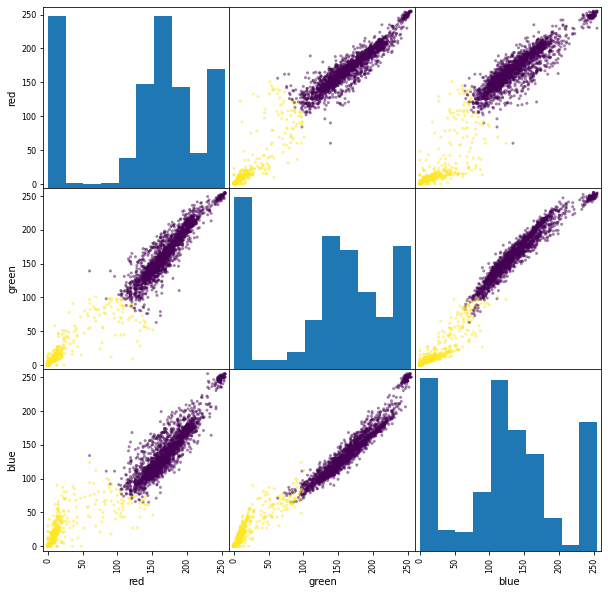

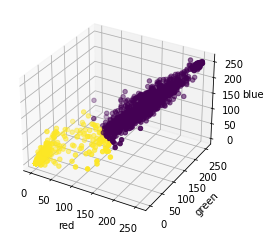

In [22]:
displayFeatures2d(featLearn, pred_featLearn)
displayFeatures3d(featLearn, pred_featLearn)
plt.show()

## Q5. A ce stade, vous avez choisi les hyper-paramètres de vos m´ethodes de machine learning et obtenu le modèle de classement, nous pouvons alors utiliser les données d’apprentissage pour classifier l’ensemble des deux images. Il faut calculer les descripteurs sur toute l’image (mise sous la forme d’une matrice) puis utiliser le modèle de classement issu de l’apprentissage du k-means). Compléter les scripts aralsea main.py et unsupervisedClassifying.py.


In [23]:
def unsupervisedClassifying(model, feat):
    ''' classement/prédiction à partir d'un modèle de classement non supervisé
    feat est la matrice du jeu de données à classer
    label est la classe prédite
    '''
    prep = selectFeatureVectors(feat, 1)
    label = model.predict(prep[0])
    
    
    
    return label
    

In [24]:
pred73 = unsupervisedClassifying(model_learn, img73)
pred87 = unsupervisedClassifying(model_learn, img87)

## Q6. Pour visualiser le résultat de classification, il faut que chaque classe prédite puisse être affectée au pixel correspondant de l’image. Cette image est calculée et visualisée par la fonction displayImageLabel.py. Compléter aralsea_main.py

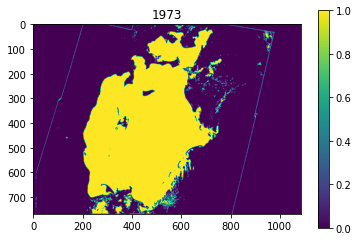

1987:


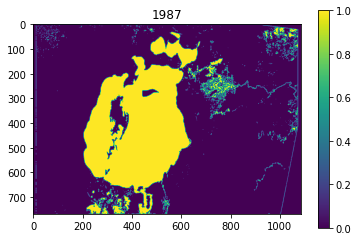

In [25]:
displayImageLabel(pred73, img73)
plt.title("1973")
plt.show()
plt.title("1987")
print("1987:")
displayImageLabel(pred87, img87)
plt.show()

## Q7. Aprés avoir identifiée sur l’image la couleur de la classe (et son numéro) de la zone correspondant à la mer d’Aral, il est possible d’en estimer la surface (i.e. le nombre de pixels) sur les deux images et d’en estimer l’évolution. Quelle est approximativement cette évolution en % ? Pour répondre à cette question compléter aralsea_main.py

In [26]:
answer = input('Numero de la classe de la mer ? ')
cl_mer = int(answer)
sea_px_73 = np.count_nonzero(pred73 == cl_mer)
sea_px_87 = np.count_nonzero(pred87 == cl_mer)

evol = ((sea_px_87 - sea_px_73) / sea_px_73)*100

print("Evolution de la Mer d'aral (entre 1973 et 1987): {:.3f}% de sa surface de 1973".format(evol))


Numero de la classe de la mer ?  1


Evolution de la Mer d'aral (entre 1973 et 1987): -20.411% de sa surface de 1973


## Q8. Analyser en fonction des paramètres du kmeans, la création de classe dans l’espace des descripteurs et donner l’impact que cela a sur le pourcentage estimé ?


# 7 Approche non-supervisée par GMM

## Q1.  Décrire en détails, l’apprentissage du classifieur non supervisé basé sur les mélanges de gaussiennes.


## Q2. Compléter votre code pour apprendre un classifieur basé des mélanges de gaussiennes